# Text_Classification_Using_NLP

- **Project Objective**: Develop a machine learning model to accurately classify given statements into either **active or passive** voice. We are using **Text Classification** to classify the text into active or passive.

- **Description:**

    The goal of this project is to create a machine learning model that can automatically classify sentences or statements into either active or passive voice. Active and passive voice are two different ways to structure sentences, and being able to distinguish between them can be useful in various natural language processing tasks.

    **Active Voice:** In active voice, the subject of the sentence performs the action. The structure is typically "Subject-Verb-Object." For example, "The cat (subject) chased (verb) the mouse (object)."
    
    **Passive Voice:** In passive voice, the object of the action becomes the subject of the sentence. The structure is typically "Object-Verb-Past Participle of Verb-By + Agent (optional)." For example, "The mouse (subject) was chased (verb) by the cat (agent)."

## NLP
NLP, or Natural Language Processing, is a field of artificial intelligence (AI) that focuses on enabling computers to understand, interpret, and generate human language. It involves the development of algorithms and models to process, analyze, and extract meaningful information from **text and speech data**.
- NLP is used in various applications, including chatbots, sentiment analysis, machine translation, speech recognition, and more, to make human-computer interactions more natural and meaningful.

## What is Text Classification ? 
Text classification is a fundamental natural language processing (NLP) task that involves categorizing text documents, sentences, or phrases into predefined classes or categories based on their content. It's also known as text categorization or document classification

### Key Aspects of Text Classification

- **Data Acquisition**
- **Text Processing**
- **Text Vectorization** 
- **Modelling** 
- **Evaluation** - Accuracy and Classification Report

### Data Acquisition
Data acquisition is the process of gathering and obtaining data from various sources.

In [1]:
# Import all Libraries
import pandas as pd                                                    # For Loading the Dataset
from sklearn.preprocessing import LabelEncoder                         # For converting categorical fetures to numerical
from sklearn.feature_extraction.text import CountVectorizer            # For converting text into numerical data
from sklearn.model_selection import train_test_split                   # For spliting data into train, validation and test set
from sklearn.naive_bayes import GaussianNB                             # For Naive Bias Model
from sklearn.ensemble import RandomForestClassifier                    # For Random Forest Classifer Model
from sklearn.metrics import classification_report                      # For Classification Report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay      # For accuracy and confusion_matrix
from pickle import dump                                                # Saving the model

In [2]:
# Loading the Datasets
df = pd.read_csv('immverse_ai_eval_dataset (2).csv')

### Analysing Data

In [3]:
df.head(5)              # shows 1st 5 rows of dataset

,id,sentence,voice
0,1,The chef prepares the meal.,Active
1,2,The teacher explains the lesson clearly.,Active
2,3,The gardener waters the plants every morning.,Active
3,4,The kids play soccer in the park.,Active
4,5,The author wrote a thrilling novel.,Active


In [4]:
df['voice'].value_counts()                # counts unique value in the dataset

voice
Active     20
Passive    20
Name: count, dtype: int64

In [5]:
df.isnull().sum()                 # shows if there are missing values in the dataset

id          0
sentence    0
voice       0
dtype: int64

### Text PreProcessing
Text processing involves manipulating and analyzing text data to extract, transform, or derive meaningful information. It includes tasks such as text cleaning,etc.

In [6]:
# Remove tags (unecessary symbols)
import re
def remove_tags(statement_text):
    cleaned_text = re.sub(re.compile('<.*?>'),'', statement_text)
    return cleaned_text

In [7]:
df['sentence']  = df['sentence'].apply(remove_tags)

In [8]:
df['sentence'] = df['sentence'].apply(lambda x:x.lower())          # Convert all words to lowercase

In [9]:
df.sample(5)

,id,sentence,voice
2,3,the gardener waters the plants every morning.,Active
5,6,the scientist conducts experiments in the lab.,Active
29,30,stunning pictures are taken by the photographer.,Passive
11,12,the journalist reports the news accurately.,Active
23,24,soccer is played in the park by the kids.,Passive


### Spliting The Data

In [10]:
X = df['sentence']            # features
y = df['voice']               # label

In [11]:
X.shape, y.shape         # shows shape of features and labels

((40,), (40,))

In [12]:
# Encoding Data (Converting categorical fetures to numerical)

le = LabelEncoder()             
y = le.fit_transform(y)

In [13]:
y           # Active = 0 and Passive = 1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
X_train,X_temp,y_train,y_temp = train_test_split(X,y,
                                                 test_size=0.4,         # training model on 60% and 40% for testing 
                                                 random_state=2)        # Seed for random number generation


In [15]:
X_test, X_valid, y_test ,y_valid = train_test_split(X_temp, y_temp,
                                                    test_size=0.5,      # 20% Validation Data from testing data
                                                    random_state=2)

In [16]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(X_valid.shape,y_valid.shape)

(24,) (24,)
(8,) (8,)
(8,) (8,)


### Text Vectorization

Text vectorization is the conversion of text data into numerical form so that computers can process and analyze it. It transforms words and documents into numerical vectors, enabling machine learning and natural language processing tasks. Common methods include BoW, TF-IDF and word embeddings.

- Bag Of Words
The "Bag of Words" (BoW) is a simplified representation of text data, where words are treated as individual units and their frequency of occurrence is counted. It discards grammar, word order, and context, focusing only on word frequencies. 

In [17]:
cv = CountVectorizer()         # collect of text documents into numerical feature vectors       

X_train_bow = cv.fit_transform(X_train).toarray()
X_test_bow = cv.transform(X_test).toarray()
X_valid_bow = cv.transform(X_valid).toarray()

In [18]:
X_train_bow.shape, X_test_bow.shape,X_valid_bow.shape

((24, 80), (8, 80), (8, 80))

### Model Training 
Modeling is the process of creating mathematical or computational representations (models) that simulate real-world phenomena or data patterns.

#### Guassian Naive Bayes Algorithm
Gaussian Naive Bayes is a classification algorithm that assumes features are normally distributed within classes and uses Bayes' theorem to calculate **probabilities** for class prediction. It's particularly useful when dealing with continuous data.

In [19]:
gnb = GaussianNB()
gnb.fit(X_train_bow,y_train)

GaussianNB()

In [20]:
# Calculating Accuracy of Validation set

y_pred_val = gnb.predict(X_valid_bow)
print("Accuracy Of Validation Data : " ,accuracy_score(y_valid,y_pred_val))

Accuracy Of Validation Data :  0.25


In [21]:
# Calculating Accuracy of Test set

y_pred_test = gnb.predict(X_test_bow)
print("Accuracy of test Data : " ,accuracy_score(y_test,y_pred_test))

Accuracy of test Data :  0.5


- **Classification Report** - The classification report is a valuable tool for assessing the strengths and weaknesses of a classification model. It helps in understanding how well the model is performing for each class and whether it's biased towards any particular class.

In [22]:
print("Validation Set Classification Report of GuassianNB:")
print(classification_report(y_valid,y_pred_val))

Validation Set Classification Report of GuassianNB:
              precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       0.33      0.20      0.25         5

    accuracy                           0.25         8
   macro avg       0.27      0.27      0.25         8
weighted avg       0.28      0.25      0.25         8



In [23]:
print("Test Set Classification Report of GuassianNB:")
print(classification_report(y_test,y_pred_test))

Test Set Classification Report of GuassianNB:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.33      1.00      0.50         2

    accuracy                           0.50         8
   macro avg       0.67      0.67      0.50         8
weighted avg       0.83      0.50      0.50         8



- **According to Classification Report, we are getting accuracy of 50% which is termed as average model. So we will use anaother Algorithm**

#### Random Forest Classifier Algorithm
Random Forest Classifier works by constructing multiple decision trees, each trained on a different subset of data with randomized features. It then combines the predictions from these trees through majority voting to make robust and accurate classification predictions, making it a powerful tool for a wide range of classification tasks.

In [24]:
rf = RandomForestClassifier()
rf.fit(X_train_bow,y_train)

RandomForestClassifier()

In [25]:
# Calculating Accuracy of Validation set

y_pred_val1 = rf.predict(X_valid_bow)
print("Accuracy Of Validation Data : ",accuracy_score(y_valid,y_pred_val1))

Accuracy Of Validation Data :  1.0


In [26]:
# Calculating Accuracy of Test set

y_pred_test1 = rf.predict(X_test_bow)
print("Accuracy of test Data : ", accuracy_score(y_test,y_pred_test1))

Accuracy of test Data :  1.0


In [27]:
print("Validation Set Classification Report of Random Forest Classifier:")
print(classification_report(y_valid,y_pred_val1))

Validation Set Classification Report of Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [28]:
print("Test Set Classification Report of Random Forest Classifier:")
print(classification_report(y_test,y_pred_test1))

Test Set Classification Report of Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



Confusion Matrix of RFC Validation set


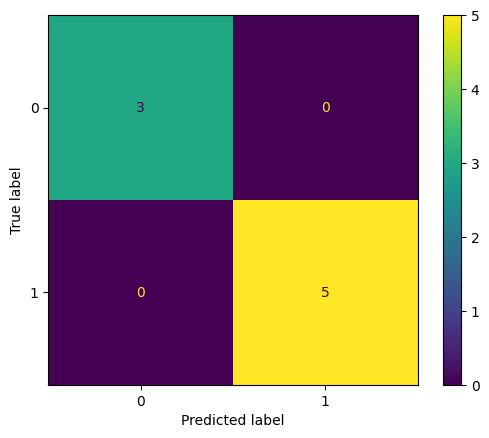

In [29]:
print("Confusion Matrix of RFC Validation set")
print(ConfusionMatrixDisplay.from_predictions(y_valid,y_pred_val1))

Confusion Matrix of RFC test set


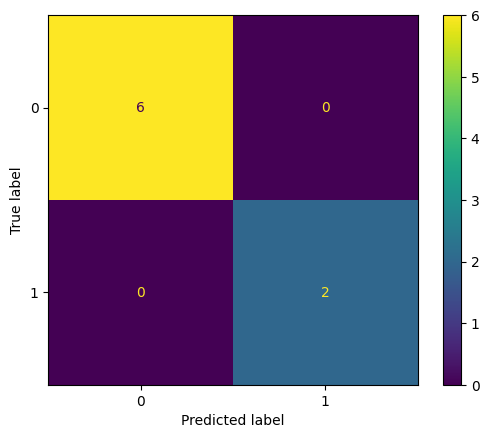

In [30]:
print("Confusion Matrix of RFC test set")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test1))

- **As we are getting accuracy of 100% using Random Forest Classifier, So it is considered as perfect Model**

### Predicting on New Data

In [31]:
# data = {'sent':'He writes a letter'}
data = {'sent':'An essay is written by him'}
data_df = pd.DataFrame(data, index=[0])
data_df

,sent
0,An essay is written by him


In [32]:
data_df['sent'] = data_df['sent'].apply(lambda x:x.lower())
a = cv.transform(data_df['sent']).toarray()
voice = rf.predict(a)[0]
voice

1

In [33]:
if (voice == 0):
    print("Sentence is in active Voice")
else:
    print("Sentence is in passive Voice")

Sentence is in passive Voice


### Saving the Model

In [34]:
# Saving model into pickle file

dump(rf, open('Text_Classification.pkl', 'wb'))